In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
#Change directory to access advertising.csv
os.chdir(r'C:\Users\User\Downloads')




In [40]:
#Read in the advertising data: it has: TV, Radio, Newspaper, and Sales rows ($)
df = pd.read_csv('advertising.csv')

#Read in the features which are the TV advertising money, Radio advertising money, and Newspaper advertising money
x = df.iloc[1:,:3].values.astype(np.float64)

#Read in the target variable which is the Sales row
y = df.iloc[1:,3].values.astype(np.float64)

#Normalizing the data by calculating the mean and standard deviation to perform this calculation: (x-mean)/std
means = np.mean(x, axis=0)
stds = np.std(x, axis=0)
x = (x - means) / stds

#Initialize variables for gradient descent to be used later 
w = np.array([0.0, 0.0, 0.0])
b = 0.0
num_iters = 1000
alpha = 0.01


In [42]:
#Computing the cost function via calculating the dot product to make our prediction and subtracting that from the actual 
def compute_cost(x,y,w,b):
    
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        
        prediction = np.dot(x[i],w) + b
        
        total_cost += (prediction - y[i])**2
    
    total_cost /= (2 * m)
    
    return total_cost
    
    
    

In [41]:

#Calculating the partial derivatives in respect to w and b
def gradients(x,y,w,b):
    
    m,n = x.shape
    w_der = np.zeros_like(w)
    b_der = 0.0
    for i in range(m):
        err = (np.dot(x[i],w) + b) - y[i]
        for j in range(n):
            w_der[j] += (err) * float(x[i,j])
        b_der += (err)
    w_der /= m
    b_der /= m
    
    return w_der,b_der
      

In [51]:

#Gradient descent function which takes in cost and gradients function
def gradient_descent(x,y,w,b,num_iters,alpha,compute_cost,gradients):
    J_history = []
    
    
    for i in range(num_iters):
        w_F,b_F = gradients(x,y,w,b)
        
        w = w -(alpha * w_F)
        b = b -(alpha* b_F)
    
       # if i < 10000:
        J_history.append(compute_cost(x,y,w,b))
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    
    return w,b,J_history
    

In [52]:
#Calling gradient descent function which prints out the iteration and the cost (which is constantly appended to J_history even iteration)
w_F, b_F, J_historydude = gradient_descent(x,y,w,b,num_iters,alpha,compute_cost,gradients)

Iteration    0: Cost   108.98
Iteration  100: Cost    15.68
Iteration  200: Cost     3.34
Iteration  300: Cost     1.66
Iteration  400: Cost     1.43
Iteration  500: Cost     1.40
Iteration  600: Cost     1.39
Iteration  700: Cost     1.39
Iteration  800: Cost     1.39
Iteration  900: Cost     1.39


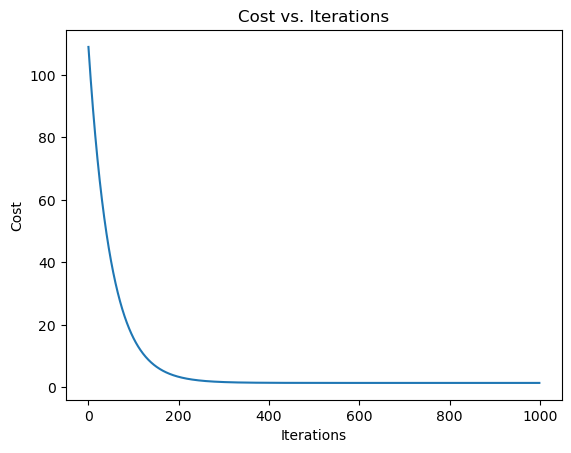

In [53]:
#Plotting number of iterations on x-axis vs. the cost function on the y-axis showing the minimization of the cost function
plt.plot(range(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [56]:
m,_ = x.shape
for i in range(m):
    print(f"prediction: {np.dot(x[i], w_F) + b_F:0.2f}, target value: {y[i]}")

prediction: 12.32, target value: 10.4
prediction: 12.28, target value: 9.3
prediction: 17.57, target value: 18.5
prediction: 13.17, target value: 12.9
prediction: 12.45, target value: 7.2
prediction: 11.73, target value: 11.8
prediction: 12.13, target value: 13.2
prediction: 3.75, target value: 4.8
prediction: 12.55, target value: 10.6
prediction: 7.04, target value: 8.6
prediction: 17.28, target value: 17.4
prediction: 10.56, target value: 9.2
prediction: 8.84, target value: 9.7
prediction: 18.41, target value: 19.0
prediction: 20.79, target value: 22.4
prediction: 12.78, target value: 12.5
prediction: 23.19, target value: 24.4
prediction: 9.96, target value: 11.3
prediction: 14.16, target value: 14.6
prediction: 18.07, target value: 18.0
prediction: 14.73, target value: 12.5
prediction: 6.48, target value: 5.6
prediction: 16.53, target value: 15.5
prediction: 8.15, target value: 9.7
prediction: 15.60, target value: 12.0
prediction: 14.99, target value: 15.0
prediction: 17.04, target 